In [1]:
#from ngauge import Neuron as n
from glob import glob

from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

#import wrapper as w
#import clustering as c


In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
#rc('font',**{'family':'sans-serif'})

In [3]:
# This block 
 
import sys
sys.path = [ "../../" ] + sys.path

import ngauge
from ngauge import Neuron as n

ngauge.__version__

'0.1.5'

In [4]:
# Define a function to calculate a large number of statistics inline
def fillStatsDict( a ):
    return {
        "num_tips":a.total_tip_nodes(),
        "cell_height":a.total_height(),
        "cell_width":a.total_width(),
        "total_branch_nodes":a.total_branch_nodes(),
        "avg_thickness":a.average_thickness(),
        "volume":a.total_volume(),
        "max_branch_order":a.max_branching_order(),
        "max_segment":a.max_segment_length(),
        "max_path_angle":a.max_path_angle(),
        "min_branch_angle":a.min_branch_angle(),
        "avg_branch_angle":a.avg_branch_angle(),
        "max_branch_angle":a.max_branch_angle(),
        "max_tortuosity": a.max_tortuosity()
    }

In [5]:
# Create three lists to include the neuron objects, cell type labels, and the
# morphometric stats calculated from each neuron
neurons = []
cell_labels = []
neuron_quantification = [] 

# Loop through all SWC files
for nname in glob("public_data/OlfactoryBulb/**/*.swc"):
    # Identify what group it is from file name
    group_name = nname.split('/')[2]
    
    # Read neuron and save to list
    neurons.append( n.from_swc( nname ) )
    
    # Add cell type label to list of labels'
    cell_labels += [ 1 if group_name=="MitralCells" else 2 ]
    
    # Add quatification for each cell
    neuron_quantification.append( list(fillStatsDict(neurons[-1]).values()) )
    
    print( nname, group_name, cell_labels[-1] )

public_data/OlfactoryBulb/MitralCells/IF04344.CNG.swc MitralCells 1
public_data/OlfactoryBulb/MitralCells/IF04360.CNG.swc MitralCells 1
public_data/OlfactoryBulb/MitralCells/IF04208.CNG.swc MitralCells 1
public_data/OlfactoryBulb/MitralCells/IF04193.CNG.swc MitralCells 1
public_data/OlfactoryBulb/MitralCells/IF04168.CNG.swc MitralCells 1
public_data/OlfactoryBulb/MitralCells/IF04230.CNG.swc MitralCells 1
public_data/OlfactoryBulb/MitralCells/IF04063.CNG.swc MitralCells 1
public_data/OlfactoryBulb/TuftedCells/IF04191.CNG.swc TuftedCells 2
public_data/OlfactoryBulb/TuftedCells/IF04174.CNG.swc TuftedCells 2
public_data/OlfactoryBulb/TuftedCells/IF04355.CNG.swc TuftedCells 2
public_data/OlfactoryBulb/TuftedCells/IF04189.CNG.swc TuftedCells 2
public_data/OlfactoryBulb/TuftedCells/IF04204.CNG.swc TuftedCells 2
public_data/OlfactoryBulb/TuftedCells/IF04155.CNG.swc TuftedCells 2
public_data/OlfactoryBulb/TuftedCells/IF04316.CNG.swc TuftedCells 2
public_data/OlfactoryBulb/TuftedCells/IF04206.CN

In [6]:
fillStatsDict( neurons[-1])

{'num_tips': 79,
 'cell_height': 1087.6,
 'cell_width': 1153.08,
 'total_branch_nodes': 76,
 'avg_thickness': 0.4976320562956566,
 'volume': 1328106188.4681597,
 'max_branch_order': 15,
 'max_segment': 1574.2465900817622,
 'max_path_angle': 180.0,
 'min_branch_angle': 21.057569935122004,
 'avg_branch_angle': 85.05089436377273,
 'max_branch_angle': 173.77734849911525,
 'max_tortuosity': 0.2904584662651188}

Explained Variance: [1.00000000e+00 3.81347407e-13]


<Figure size 864x864 with 0 Axes>

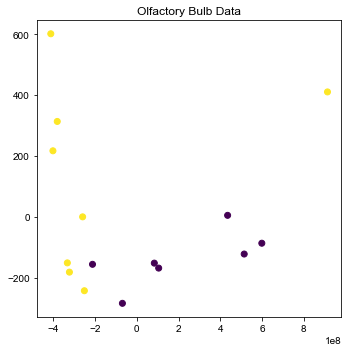

In [7]:
plt.figure(figsize=(12, 12))
pca = PCA(n_components=2, svd_solver='full')
allDim = pca.fit_transform(neuron_quantification)
pca = pca.fit(neuron_quantification)

print("Explained Variance:", pca.explained_variance_ratio_)

x_ob = allDim[:, 0]
y_ob = allDim[:, 1]

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(x_ob, y_ob, c=cell_labels)
plt.title("Olfactory Bulb Data")

plt.show()

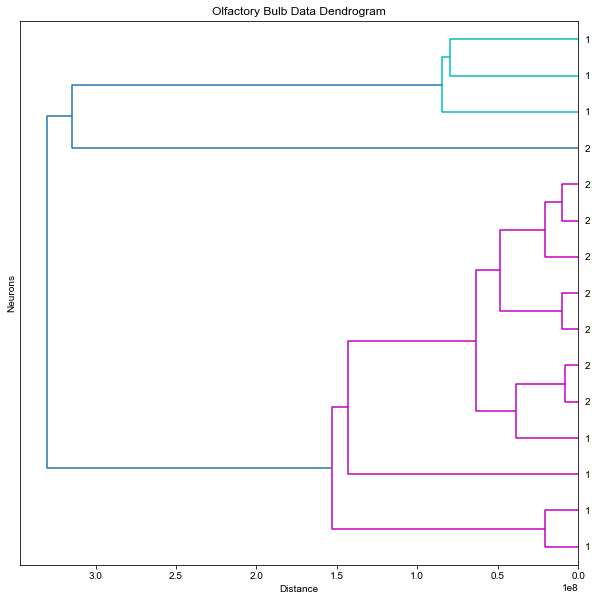

In [8]:
Z = hierarchy.linkage(neuron_quantification, 'single')
plt.figure(figsize=(10, 10))
plt.title("Olfactory Bulb Data Dendrogram", fontdict = {'fontsize' : 12})
plt.ylabel('Neurons', fontdict = {'fontsize' : 10})
plt.xlabel('Distance', fontdict = {'fontsize' : 10})

# plot the top three levels of the dendrogram
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
dendrogram(Z, orientation = "left", labels=cell_labels, leaf_font_size = 10)
plt.show()

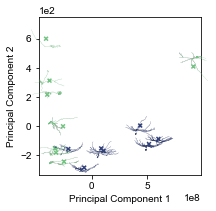

In [9]:
# Make a nice PCA figure
fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(3)
ax = fig.add_subplot(111)

# Plot data from PCA
ax.scatter(x_ob, y_ob, c=[ ( (115/256,196/256,132/256) if x==2 else (52/256, 66/256, 123/256) ) for x in cell_labels ], s=15, marker='x' )
ax.scatter( [-2.5*10**7,3*10**7], [0,700], s=0)

ylim = ax.get_ylim()
xlim = ax.get_xlim()

for i,_ in enumerate(neurons):
    # Find a coordinate to plot neuron subfigures
    toplot = [ 
        (x_ob[i]-xlim[0])/abs(xlim[1]-xlim[0]),
        (y_ob[i]-ylim[0])/abs(ylim[1]-ylim[0])
    ]
    
    # Make subfigure to plot each neuron
    ax_temp = ax.inset_axes([toplot[0]-.1,toplot[1]-0.1,0.2,0.2])
    ax_temp.patch.set_alpha(0)
    ax_temp.xaxis.set_ticklabels([])
    ax_temp.yaxis.set_ticklabels([])
    ax_temp.axis('off')
    ax_temp.set_aspect('equal')

    # Plot each Neuron
    color=[ ( (115/256,196/256,132/256) if x==2 else (52/256, 66/256, 123/256) ) for x in cell_labels ][i]
    neurons[i].plot(ax=ax_temp, fig=fig, color=color, axis='x', linewidth=.2)

# Label Axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Change plotting parameters
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.subplots_adjust(bottom=0.15,left=0.15)

# Save Figure to PDF
fig.savefig( 'PanelB.pdf', transparent=True )
plt.show()


In [10]:
# Create three lists to include the neuron objects, cell type labels, and the
# morphometric stats calculated from each neuron
neurons = []
cell_labels = []
neuron_quantification = [] 

# Loop through all SWC files
for nname in glob("public_data/BasketPyramidal/**/*.swc"):
    # Identify what group it is from file name
    group_name = nname.split('/')[2]
    
    # Read neuron and save to list
    neurons.append( n.from_swc( nname ) )
    
    # Add cell type label to list of labels'
    cell_labels += [ 1 if group_name=="PyramidalCells" else 2 ]
    
    # Add quatification for each cell
    neuron_quantification.append( list(fillStatsDict(neurons[-1]).values()) )
    
    print( nname, group_name, cell_labels[-1] )

public_data/BasketPyramidal/PyramidalCells/D110523PYR.CNG.swc PyramidalCells 1
public_data/BasketPyramidal/PyramidalCells/B110430PYR.CNG.swc PyramidalCells 1
public_data/BasketPyramidal/PyramidalCells/A110111PYR.CNG.swc PyramidalCells 1
public_data/BasketPyramidal/PyramidalCells/G110524PYR.CNG.swc PyramidalCells 1
public_data/BasketPyramidal/PyramidalCells/I101119PYR.CNG.swc PyramidalCells 1
public_data/BasketPyramidal/BasketCells/G100312INT.CNG.swc BasketCells 2
public_data/BasketPyramidal/BasketCells/D100308INT.CNG.swc BasketCells 2
public_data/BasketPyramidal/BasketCells/J100312INT.CNG.swc BasketCells 2


Explained Variance: [1.00000000e+00 4.58514921e-11]


<Figure size 864x864 with 0 Axes>

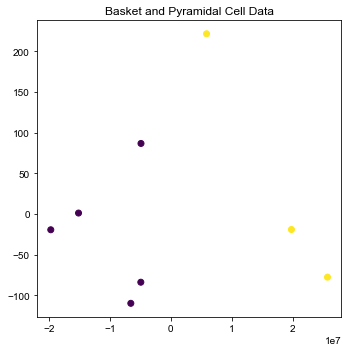

In [11]:
plt.figure(figsize=(12, 12))
pca = PCA(n_components=2, svd_solver='full')
allDim = pca.fit_transform(neuron_quantification)
pca = pca.fit(neuron_quantification)

print("Explained Variance:", pca.explained_variance_ratio_)

x_bp = allDim[:, 0]
y_bp = allDim[:, 1]

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(x_bp, y_bp, c=cell_labels)
plt.title("Basket and Pyramidal Cell Data")

plt.show()

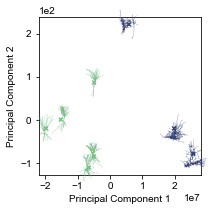

In [12]:
# Make a nice PCA figure
fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(3)
ax = fig.add_subplot(111)

# Plot data from PCA
ax.scatter(x_bp, y_bp, c=[ ( (115/256,196/256,132/256) if x==1 else (52/256, 66/256, 123/256) ) for x in cell_labels ], s=15, marker='x' )
#ax.scatter( [-2.5*10**7,3*10**7], [0,700], s=0)

ylim = ax.get_ylim()
xlim = ax.get_xlim()

for i,_ in enumerate(neurons):
    # Find a coordinate to plot neuron subfigures
    toplot = [ 
        (x_bp[i]-xlim[0])/abs(xlim[1]-xlim[0]),
        (y_bp[i]-ylim[0])/abs(ylim[1]-ylim[0])
    ]
    
    # Make subfigure to plot each neuron
    ax_temp = ax.inset_axes([toplot[0]-.1,toplot[1]-0.1,0.2,0.2])
    ax_temp.patch.set_alpha(0)
    ax_temp.xaxis.set_ticklabels([])
    ax_temp.yaxis.set_ticklabels([])
    ax_temp.axis('off')
    ax_temp.set_aspect('equal')

    # Plot each Neuron
    color=[ ( (115/256,196/256,132/256) if x==1 else (52/256, 66/256, 123/256) ) for x in cell_labels ][i]
    neurons[i].plot(ax=ax_temp, fig=fig, color=color, axis='z', linewidth=.2)

# Label Axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Change plotting parameters
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gcf().subplots_adjust(bottom=0.15,left=0.15)

# Save Figure to PDF
plt.savefig( 'PanelA.pdf', transparent=True )